**[LeetCode Link](https://leetcode-cn.com/problems/delete-node-in-a-bst/solution/shan-chu-er-cha-sou-suo-shu-zhong-de-jie-dian-by-l/)**

## 递归
* `Successor` 代表的是中序遍历序列的下一个节点。即比当前节点大的最小节点，简称后继节点。 先取当前节点的右节点，然后一直取该节点的左节点，直到左节点为空，则最后指向的节点为后继节点。
```
def successor(root):
    root = root.right
    while root.left:
        root = root.left
    return root
```
* `Predecessor` 代表的是中序遍历序列的前一个节点。即比当前节点小的最大节点，简称前驱节点。先取当前节点的左节点，然后取该节点的右节点，直到右节点为空，则最后指向的节点为前驱节点。
```
def predecessor(root):
    root = root.left
    while root.right:
        root = root.right
    return root
```

### 分析
这里有三种可能的情况：
* 要删除的节点为叶子节点，可以直接删除。
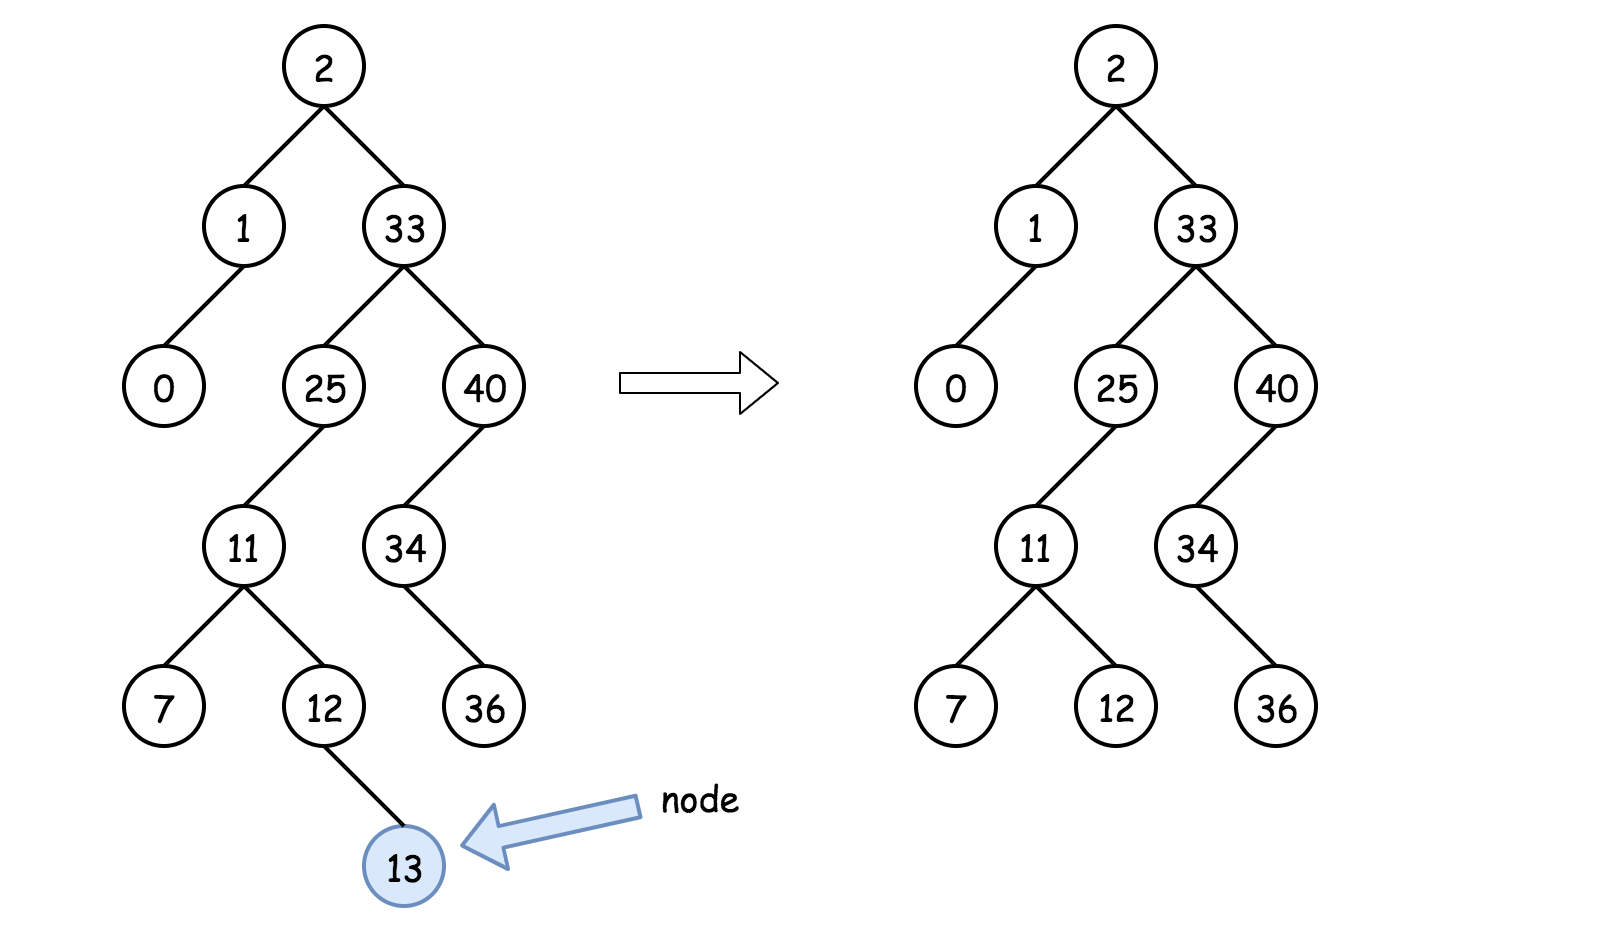
* 要删除的几点不是叶子节点且拥有右节点，则该节点可以由该节点的后继节点进行替代，该后继节点位于右子树中较低的位置。然后可以从后继节点的位置递归向下操作以删除后继节点。
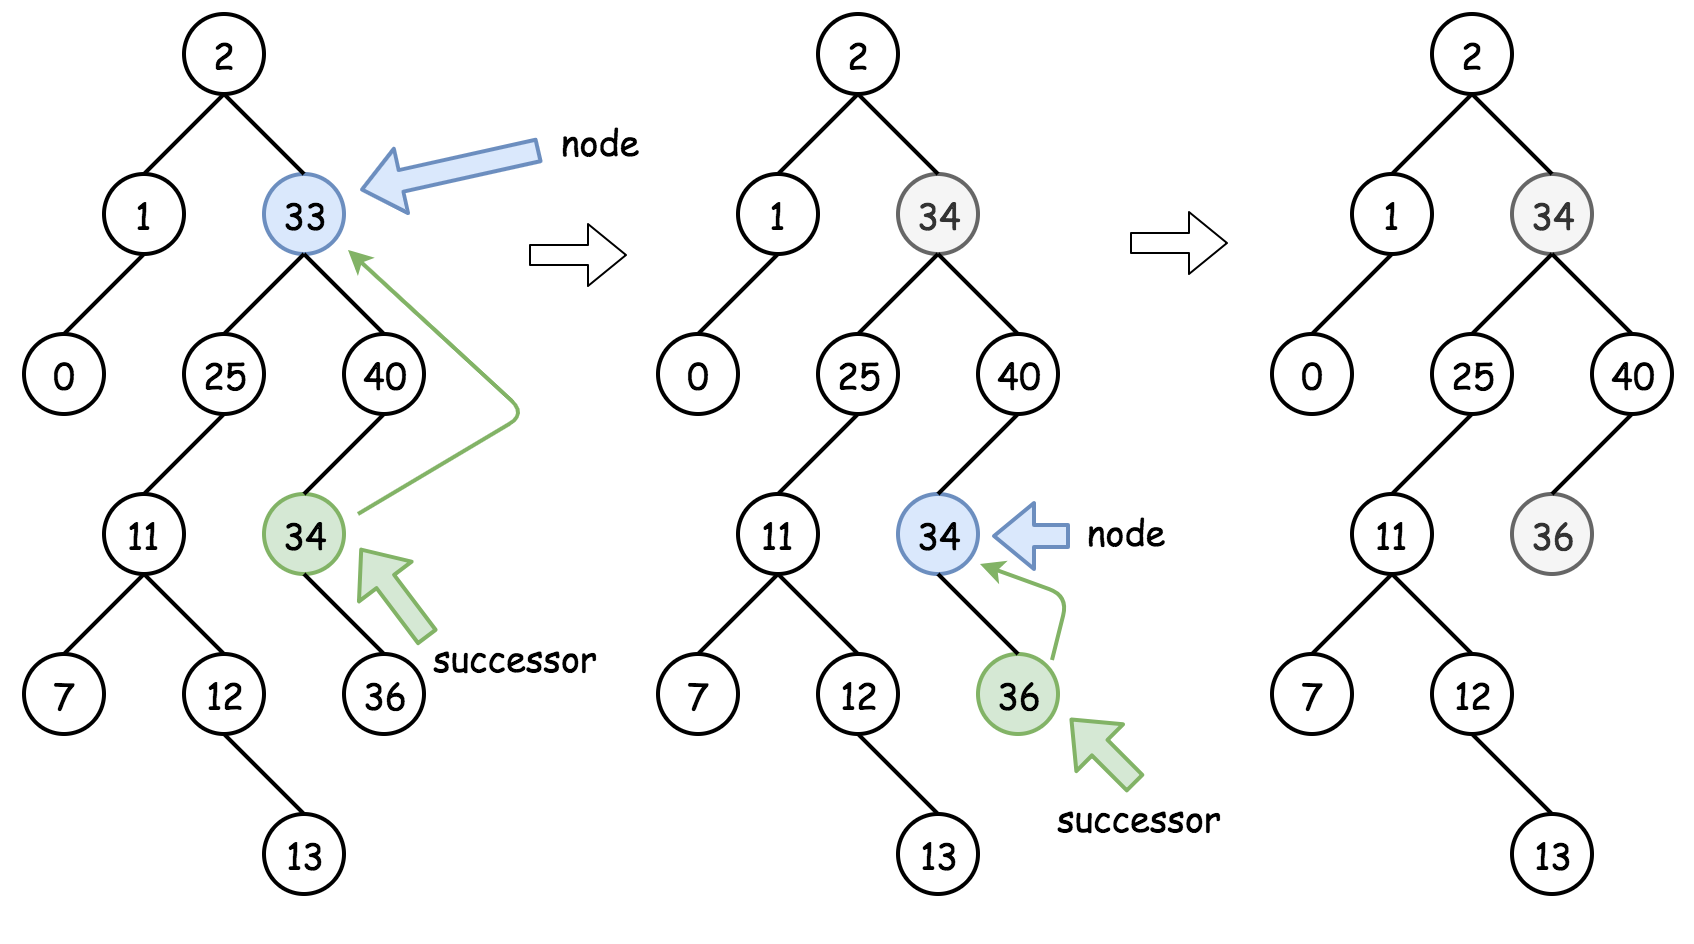
* 要删除的节点不是叶子节点，且没有右节点但是有左节点。这意味着它的后继节点在它的上面，但是我们并不想返回。我们可以使用它的前驱节点进行替代，然后再递归的向下删除前驱节点。
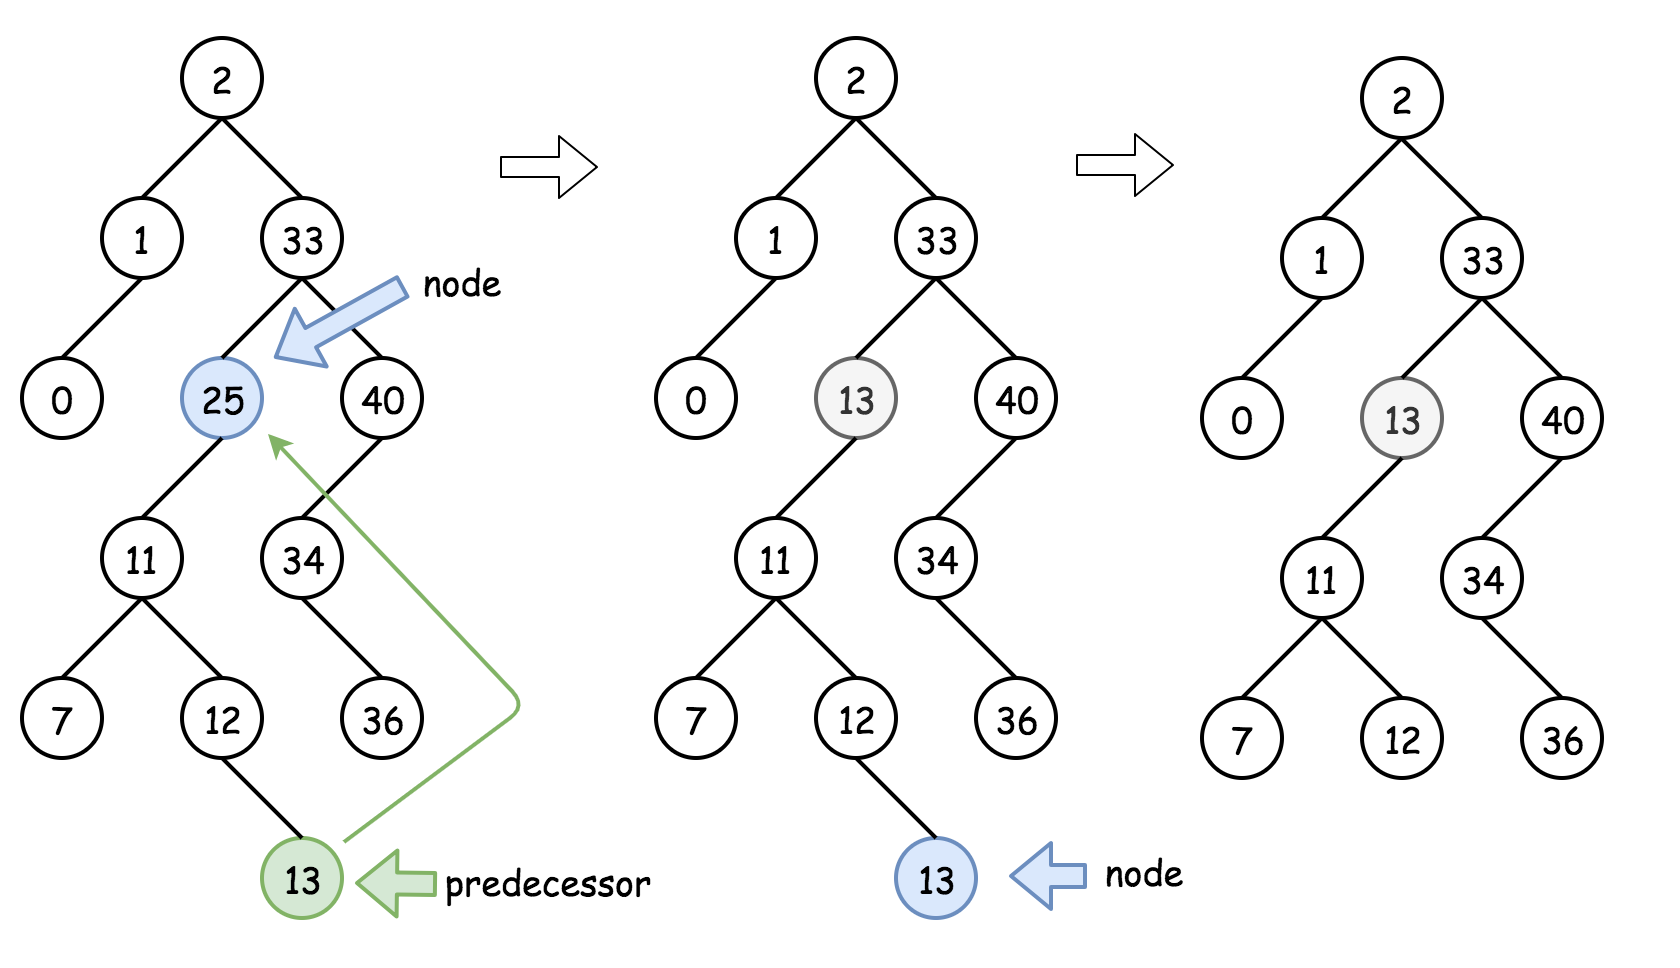

### 算法
* 如果 `key > root.val`，说明要删除的节点在右子树，`root.right = deleteNode(root.right, key)`。
* 如果 `key < root.val`，说明要删除的节点在左子树，`root.left = deleteNode(root.left, key)`。
* 如果 `key == root.val`，则该节点就是我们要删除的节点，则：
    * 如果该节点是叶子节点，则直接删除它：`root = null`。
    * 如果该节点不是叶子节点且有右节点，则用它的后继节点的值替代 `root.val = successor.val`，然后删除后继节点。
    * 如果该节点不是叶子节点且只有左节点，则用它的前驱节点的值替代 `root.val = predecessor.val`，然后删除前驱节点。
* 返回 `root`。

### 复杂度分析
* 时间复杂度：$\mathcal{O}(\log N)$。在算法的执行过程中，我们一直在树上向左或向右移动。首先先用 $\mathcal{O}(H_1)$ 的时间找到要删除的节点，$\mathcal{H_1}$ 指得是从根节点到要删除节点的高度。然后删除节点需要 $\mathcal{O}(H_2)$ 的时间，$\mathcal{H_2}$ 指的是从要删除节点到替换节点的高度。由于 $\mathcal{O}(H_1 + H_2)$ = $\mathcal{O}(H)$，$\mathcal{H}$ 指得是树的高度，若树是一个平衡树则 $\mathcal{H}$ = $\mathcal{\log N}$。
* 空间复杂度：$\mathcal{O}(H)$，递归时堆栈使用的空间，$\mathcal{H}$ 是树的高度。

In [ ]:
class Solution:
    def successor(self, root):
        """
        One step right and then always left
        """
        root = root.right
        while root.left:
            root = root.left
        return root.val
    
    def predecessor(self, root):
        """
        One step left and then always right
        """
        root = root.left
        while root.right:
            root = root.right
        return root.val
        
    def deleteNode(self, root: TreeNode, key: int) -> TreeNode:
        if not root:
            return None
        
        # delete from the right subtree
        if key > root.val:
            root.right = self.deleteNode(root.right, key)
        # delete from the left subtree
        elif key < root.val:
            root.left = self.deleteNode(root.left, key)
        # delete the current node
        else:
            # the node is a leaf
            if not (root.left or root.right):
                root = None
            # the node is not a leaf and has a right child
            elif root.right:
                root.val = self.successor(root)
                root.right = self.deleteNode(root.right, root.val)
            # the node is not a leaf, has no right child, and has a left child    
            else:
                root.val = self.predecessor(root)
                root.left = self.deleteNode(root.left, root.val)
                        
        return root